# Task 3

- Add slider function: https://www.youtube.com/watch?v=jWT-HXv0LUQ
- Have some way in the output of the code to show that this x_value is the same as L/2, even when the slider functions changes these points -- indicating its truth.
---------------

Once added this, I can move onto task 4

**Remove all writing once completed**

In [154]:
%pip install sympy
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import fsolve, minimize_scalar
import ipywidgets as ipy

In [177]:
x, y, c, n, L = sym.symbols('x y c n L', real=True)
f = (sym.sqrt(x**2 + y**2))/(c/n) + (sym.sqrt((L-x)**2+y**2))/(c/n)
dfdx = sym.diff(f,x) # derivative


print(f"f(x) = {f}\nf'(x) = {dfdx}")

f_x = sym.lambdify((x, y, c, n, L), f)
df_dx = sym.lambdify((x, y, c, n, L), dfdx)

f_x(1, 2, 3, 4, 5)

f(x) = n*sqrt(x**2 + y**2)/c + n*sqrt(y**2 + (L - x)**2)/c
f'(x) = n*x/(c*sqrt(x**2 + y**2)) + n*(-L + x)/(c*sqrt(y**2 + (L - x)**2))


np.float64(8.94427190999916)

'\n# derivative function\ndef dtdx(x):\n    return df_dx(x, y_val, c_val, n_val, L_val)\n'

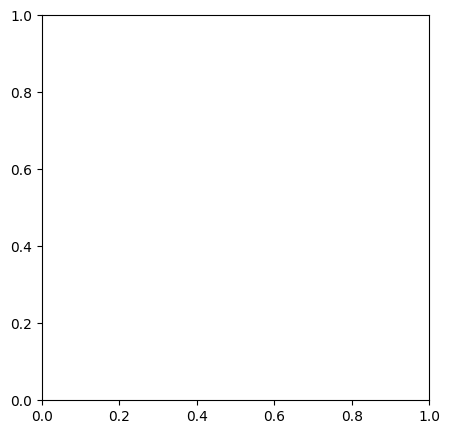

In [211]:
"""
# constants
L_val = 89
c_val = 0.05
n_val = 1.43 # air
y_val = 1.6 # some constant
"""

fig, ax = plt.subplots(figsize=(5,5)) # set figsize if need be

# x
x = np.linspace(0, L_val, 100) # length 0 to length L

# plotting
def plotting_function(y_val, n_val, L_val):
    # stops overlapping graphs from being produced
    ax.clear()
    # Define 't' as a callable function

    def t(x_input):
        return f_x(x_input, y_val, 3e8, n_val, L_val)

    # x
    x = np.linspace(0, L_val, 100)

    ax.plot(x, t(x), label="f(x)")

    # optimal path
    result = minimize_scalar(t, bounds=(0, L_val), method="bounded")
    optimal_x = result.x
    min_time = result.fun # reading the function from it

    #ax.plot(x, dtdx(x), label="f'(x)")
    ax.axhline(y=min_time,color='r', linestyle="--", label=f"minimum_time = {min_time:.4f}s")
    ax.axvline(x=optimal_x, color='r', linestyle='--', label=f"minimising x value = {optimal_x:.4f}")

    ax.set_xlabel("Length (m)")
    ax.set_ylabel("Time (s)")
    ax.legend(fancybox=True, bbox_to_anchor=(1.5, 1), loc = 'upper right', fontsize='small')

    ax.set_xlim(0, L_val)
    #ax.set_ylim(min(t(x))-(max(t(x))-min(t(x))/5), max(t(x))+(max(t(x))-min(t(x))/5))
    ax.grid()

    # redraw figure rather than doing plt.show()
    display(fig)


"""
# derivative function
def dtdx(x):
    return df_dx(x, y_val, c_val, n_val, L_val)
"""

In [213]:
ipy.interact(plotting_function, y_val=(0,100,1), n_val=(0,5,0.25), L_val=(0,100, 1))

interactive(children=(IntSlider(value=50, description='y_val'), FloatSlider(value=2.0, description='n_val', ma…

<function __main__.plotting_function(y_val, n_val, L_val)>